### Haonan Xu
### Feb 22, 2024
## FinTech 545 - Homework Week 4

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import norm, t
from statsmodels.tsa.ar_model import AutoReg
import warnings

warnings.filterwarnings('ignore')

In [175]:
# Question 1

# Simulation
pt0 = 100
mu = 0
sigma = 0.1
n = 100000

# generate random returns
r_t = np.random.normal(mu, sigma, n)

# 1. Classical Brownian
pt1 = pt0 + r_t

# 2. Arithmetic Return 
pt2 = pt0 * (1 + r_t)

# 3. Log Return/Geometric
pt3 = pt0 * np.exp(r_t)

# Calculate mean and standard deviation for each type:
mean_std_results = {
    "Classical Brownian Motion": (np.mean(pt1), np.std(pt1)),
    "Arithmetic Return System": (np.mean(pt2), np.std(pt2)),
    "Log Return or Geometric Brownian Motion": (np.mean(pt3), np.std(pt3))
}

print("SIMULATION RESULT:")
# Display the results
for return_type, results in mean_std_results.items():
    print(f"{return_type}: Mean = {results[0]:.4f}, Standard Deviation = {results[1]:.4f}")
    
    
# Compare against my expectation:
mean1 = pt0
sigma1 = sigma
mean2 = pt0
sigma2 = pt0 * sigma
mean3 = pt0 * np.exp(sigma **2 / 2)
sigma3 = pt0 * np.sqrt((np.exp(sigma **2) - 1) * np.exp(sigma **2))
est = {
    "Classical Brownian Motion": (mean1, sigma1),
    "Arithmetic Return System": (mean2, sigma2),
    "Log Return or Geometric Brownian Motion": (mean3, sigma3)
}
print("---------------------------------------")
print("EXPECTED ESTIMATE:")
# Display the results
for return_type, results in est.items():
    print(f"{return_type}: Mean = {results[0]:.4f}, Standard Deviation = {results[1]:.4f}")
    
# difference:
diff = {
    "Classical Brownian Motion": (np.mean(pt1) - mean1, np.std(pt1) - sigma1),
    "Arithmetic Return System": (np.mean(pt2) - mean2, np.std(pt2) - sigma2),
    "Log Return or Geometric Brownian Motion": (np.mean(pt3) - mean3, np.std(pt3) - sigma3)
}
print("---------------------------------------")
print("DIFFERENCE:")
# Display the results
for return_type, results in diff.items():
    print(f"Difference in {return_type}: Mean = {results[0]:.4f}, Standard Deviation = {results[1]:.4f}")

SIMULATION RESULT:
Classical Brownian Motion: Mean = 99.9999, Standard Deviation = 0.0997
Arithmetic Return System: Mean = 99.9859, Standard Deviation = 9.9667
Log Return or Geometric Brownian Motion: Mean = 100.4836, Standard Deviation = 10.0348
---------------------------------------
EXPECTED ESTIMATE:
Classical Brownian Motion: Mean = 100.0000, Standard Deviation = 0.1000
Arithmetic Return System: Mean = 100.0000, Standard Deviation = 10.0000
Log Return or Geometric Brownian Motion: Mean = 100.5013, Standard Deviation = 10.0753
---------------------------------------
DIFFERENCE:
Difference in Classical Brownian Motion: Mean = -0.0001, Standard Deviation = -0.0003
Difference in Arithmetic Return System: Mean = -0.0141, Standard Deviation = -0.0333
Difference in Log Return or Geometric Brownian Motion: Mean = -0.0177, Standard Deviation = -0.0405


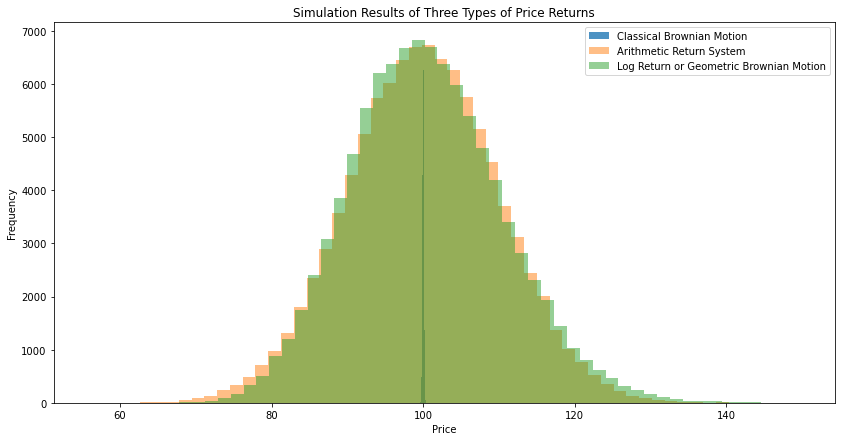

In [176]:
# Plot Price
plt.figure(figsize=(14, 7))

# Classical Brownian Motion
plt.hist(pt1, bins=50, alpha=0.8, label='Classical Brownian Motion')

# Arithmetic Return System
plt.hist(pt2, bins=50, alpha=0.5, label='Arithmetic Return System')

# Log Return or Geometric Brownian Motion
plt.hist(pt3, bins=50, alpha=0.5, label='Log Return or Geometric Brownian Motion')

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Simulation Results of Three Types of Price Returns')
plt.legend()

plt.show()

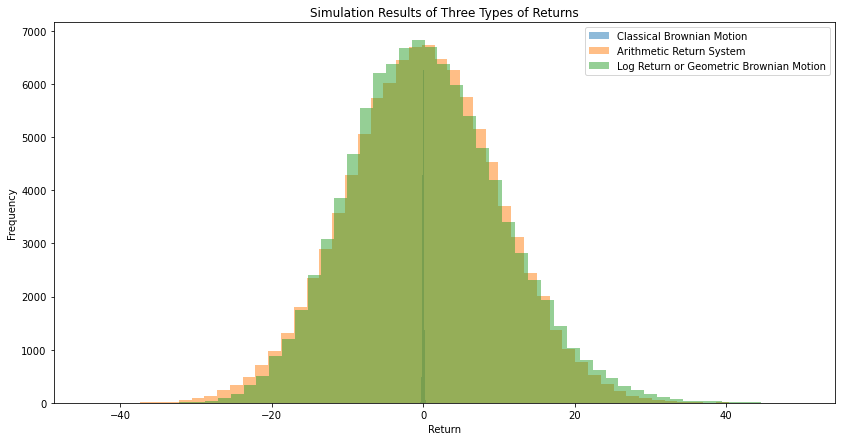

In [177]:
# Plot Return
plt.figure(figsize=(14, 7))

# Classical Brownian Motion
plt.hist(pt1 - pt0, bins=50, alpha=0.5, label='Classical Brownian Motion')

# Arithmetic Return System
plt.hist(pt2 - pt0, bins=50, alpha=0.5, label='Arithmetic Return System')

# Log Return or Geometric Brownian Motion
plt.hist(pt3 - pt0, bins=50, alpha=0.5, label='Log Return or Geometric Brownian Motion')

plt.xlabel('Return')
plt.ylabel('Frequency')
plt.title('Simulation Results of Three Types of Returns')
plt.legend()

plt.show()

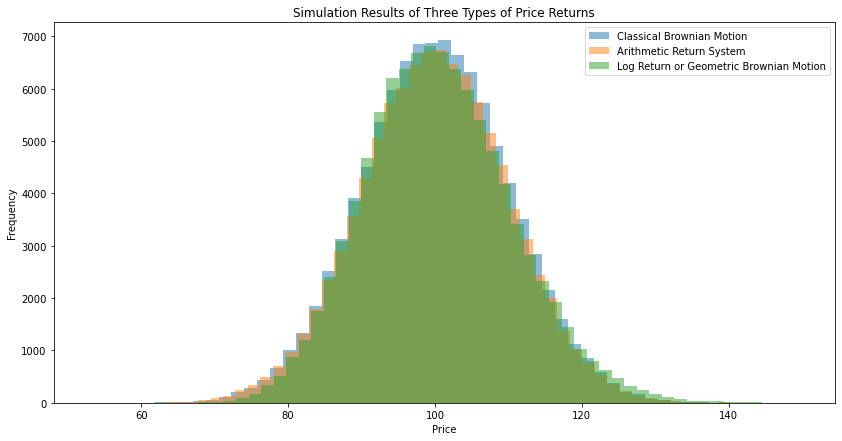

In [178]:
# 1. Classical Brownian
r_t = np.random.normal(mu, 10, n)
pt1 = pt0 + r_t

# Plot Price
plt.figure(figsize=(14, 7))

# Classical Brownian Motion
plt.hist(pt1, bins=50, alpha=0.5, label='Classical Brownian Motion')

# Arithmetic Return System
plt.hist(pt2, bins=50, alpha=0.5, label='Arithmetic Return System')

# Log Return or Geometric Brownian Motion
plt.hist(pt3, bins=50, alpha=0.5, label='Log Return or Geometric Brownian Motion')

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Simulation Results of Three Types of Price Returns')
plt.legend()

plt.show()

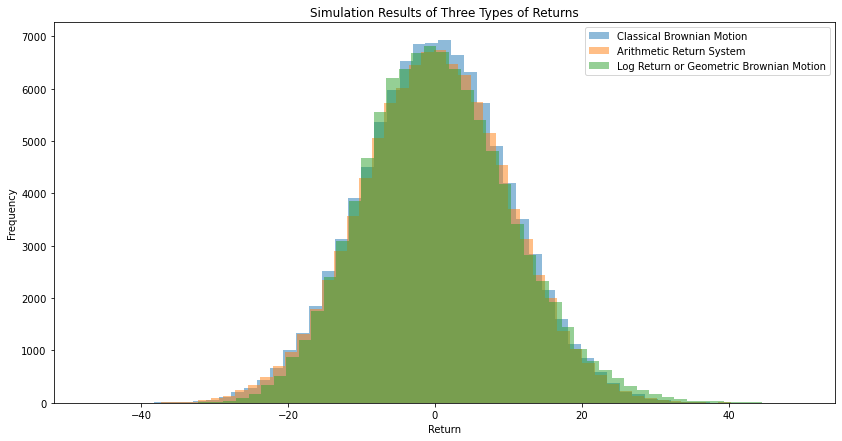

In [179]:
# Plot Return
plt.figure(figsize=(14, 7))

# Classical Brownian Motion
plt.hist(pt1 - pt0, bins=50, alpha=0.5, label='Classical Brownian Motion')

# Arithmetic Return System
plt.hist(pt2 - pt0, bins=50, alpha=0.5, label='Arithmetic Return System')

# Log Return or Geometric Brownian Motion
plt.hist(pt3 - pt0, bins=50, alpha=0.5, label='Log Return or Geometric Brownian Motion')

plt.xlabel('Return')
plt.ylabel('Frequency')
plt.title('Simulation Results of Three Types of Returns')
plt.legend()

plt.show()

In [180]:
# Question 2

# implement return_calculate() function:
def return_calculate(file_path, method, date_column):

    df = pd.read_csv(file_path)
    
    # drop date column
    prices = df.drop(columns=[date_column])
    
    if method == 'Classical':
        returns = prices.diff().dropna()
    elif method == 'Arithmetic':
        returns = prices.pct_change().dropna()
    elif method == 'Geometric':
        returns = np.log(prices / prices.shift(1)).dropna()
    else:
        raise ValueError("Invalid return calculation method specified.")
    
    # Include the date column in the returns DataFrame
    returns[date_column] = df[date_column].iloc[returns.index]
    
    # Reorder columns to have the date column first
    cols = [date_column] + [col for col in returns if col != date_column]
    returns = returns[cols]
    
    return returns


file_path = "DailyPrices.csv"
date_column = "Date"
# Classical Brownian Motion
returns1 = return_calculate(file_path, "Classical", date_column)
# Arithmetic Return
returns2 = return_calculate(file_path, "Arithmetic", date_column)
# Log Return
returns3 = return_calculate(file_path, "Geometric", date_column)
print("Preview of arithmetic return of all assets:")
returns2.head()

Preview of arithmetic return of all assets:


,Date,SPY,AAPL,MSFT,AMZN,NVDA,GOOGL,TSLA,GOOG,BRK-B,...,CI,ETN,SLB,PGR,SCHW,LRCX,ZTS,C,BSX,AMT
1,2022-09-02,-0.010544,-0.013611,-0.016667,-0.002425,-0.020808,-0.017223,-0.025076,-0.016915,-0.016854,...,-0.001180,-0.010593,0.033107,-0.010428,-0.019242,-0.004236,-0.015244,0.001846,-0.012198,-0.026355
2,2022-09-06,-0.003773,-0.008215,-0.010974,-0.010980,-0.013336,-0.009643,0.015581,-0.011042,-0.003890,...,-0.004641,0.008449,-0.014118,0.000572,0.001848,-0.008019,-0.000892,-0.012695,-0.002717,0.013275
3,2022-09-07,0.017965,0.009254,0.019111,0.026723,0.018795,0.024717,0.033817,0.027912,0.016089,...,0.016652,0.020295,-0.008030,0.038537,0.018731,0.012279,0.022698,0.008503,0.026994,0.020930
4,2022-09-08,0.006536,-0.009618,0.001666,0.002626,0.020126,-0.009776,0.019598,-0.009595,0.008184,...,0.002448,0.013945,0.029951,0.015880,0.019083,0.016574,-0.011908,0.026116,0.029901,0.008362
5,2022-09-09,0.015535,0.018840,0.022977,0.026575,0.028377,0.020945,0.036023,0.021568,0.008576,...,0.007327,0.017244,0.038774,-0.004179,0.018863,0.026460,0.036721,0.015431,0.005385,-0.000306


In [181]:
# META
df = pd.read_csv(file_path)
meta = returns2["META"]
meta = meta - np.mean(meta)

# Parameters
alpha = 0.05  # 95% confidence level
lambda_ = 0.94  # For EWMA

# 1. Normal Distribution VaR
std_dev = meta.std()
var_normal = norm.ppf(alpha) * std_dev

# 2. Normal Distribution with EW Covar

def ewCovar(x, lam):
    # x is tuple
    m = len(x)
    w = np.empty(m)

    for i in range(m):
        w[i] = (1 - lam) * lam ** (m - i - 1)
    w /= np.sum(w)
    return np.dot(w, x**2)

ew_var = ewCovar(meta, lambda_)
var_ew = norm.ppf(alpha) * (ew_var ** 0.5)

# 3. MLE Fitted T Distribution
params = t.fit(meta)
var_t = t.ppf(alpha, *params[:-2], loc=params[-2], scale=params[-1])

# 4. Fitted AR(1) Model
ar_model = AutoReg(meta, lags=1).fit()
forecast_error_std = np.sqrt(ar_model.sigma2)
var_ar1 = norm.ppf(alpha) * forecast_error_std

# 5. Historic Simulation
var_historic = np.percentile(meta, alpha * 100)

# most recent price of META
pv = -299.079987

# Print VaR results
print("VaR of META:")
print(f"    using Normal Distribution:  {np.round(var_normal*pv, 6)}")
print(f"    using EW variance:          {np.round(var_ew*pv, 6)}")
print(f"    using MLE Fitted T:         {np.round(var_t*pv, 6)}")
print(f"    using Fitted AR(1) Model:   {np.round(var_ar1*pv, 6)}")
print(f"    using Historic Simulation:  {np.round(var_historic*pv, 6)}")


VaR of META:
    using Normal Distribution:  16.236135
    using EW variance:          8.966972
    using MLE Fitted T:         12.90073
    using Fitted AR(1) Model:   16.187455
    using Historic Simulation:  11.808949


In [185]:
# most recent price of META
pv = -1

# Print VaR results
print("VaR of META:")
print(f"    using Normal Distribution:  {np.round(var_normal*pv, 6)}")
print(f"    using EW variance:          {np.round(var_ew*pv, 6)}")
print(f"    using MLE Fitted T:         {np.round(var_t*pv, 6)}")
print(f"    using Fitted AR(1) Model:   {np.round(var_ar1*pv, 6)}")
print(f"    using Historic Simulation:  {np.round(var_historic*pv, 6)}")

VaR of META:
    using Normal Distribution:  0.054287
    using EW variance:          0.029982
    using MLE Fitted T:         0.043135
    using Fitted AR(1) Model:   0.054124
    using Historic Simulation:  0.039484


In [182]:
def ewCovar(x, lam):
    # x is df
    m, n = x.shape
    w = np.empty(m)

    for i in range(m):
        w[i] = (1 - lam) * lam ** (m - i - 1)
    w /= np.sum(w)
    w = w.reshape(-1,1)
    return (w * x).T @ x


In [183]:
# Question 3

# read price
price_df = pd.read_csv("DailyPrices.csv")

# Arithmetic Model
# calculate returns
return_df = return_calculate("DailyPrices.csv", "Arithmetic", "Date")
# drop date column
return_df = return_df.drop(columns=["Date"])
return_df = return_df - np.mean(return_df, axis=0)

return_covar = ewCovar(return_df, 0.94)

# read portfolios
ptfl_df = pd.read_csv("portfolio.csv")
ptfl_a = ptfl_df.loc[ptfl_df["Portfolio"] == "A"]
ptfl_b = ptfl_df.loc[ptfl_df["Portfolio"] == "B"]
ptfl_c = ptfl_df.loc[ptfl_df["Portfolio"] == "C"]

# calculate weight
ptfl_a.loc[ptfl_a["Stock"] == "SPY"].empty

def calculate_ptfl_weight(ptfl, price_df):
    
    ptfl_weight = []
    total_mkt_value = 0
    index = len(price_df)
    for stock in return_df.columns:
        if ptfl.loc[ptfl["Stock"] == stock].empty:
            ptfl_weight.append(0)
        else:
            holding = ptfl.loc[ptfl["Stock"] == stock]["Holding"].to_numpy()[0]
            price = price_df[stock][index - 1]
            weight = holding * price
            total_mkt_value += weight
            ptfl_weight.append(weight)
            
    ptfl_weight = ptfl_weight / total_mkt_value
    # print("TTL:", total_mkt_value)
    return ptfl_weight, total_mkt_value

def calculate_VaR(asset, ptfl, price_df, return_covar):
    ptfl_weight, total_mkt_value = calculate_ptfl_weight(ptfl, price_df)
    ptfl_sigma = ptfl_weight.T @ return_covar @ ptfl_weight

    alpha = 0.05
    z = norm.ppf(alpha)
    var = z * ptfl_sigma ** 0.5 * total_mkt_value
    print(f"For Portfolio {asset}, the 95% VaR is: ${np.round(-var, 4)}")
    
print("Arithmetic Return:")
calculate_VaR('A', ptfl_a, price_df, return_covar)
calculate_VaR('B', ptfl_b, price_df, return_covar)
calculate_VaR('C', ptfl_c, price_df, return_covar)
calculate_VaR('Total', ptfl_df, price_df, return_covar)

Arithmetic Return:
For Portfolio A, the 95% VaR is: $15426.968
For Portfolio B, the 95% VaR is: $8082.5724
For Portfolio C, the 95% VaR is: $18163.2916
For Portfolio Total, the 95% VaR is: $38941.3757


In [184]:
# Log/Geometric Return
# calculate returns
return_df = return_calculate("DailyPrices.csv", "Geometric", "Date")
# drop date column
return_df = return_df.drop(columns=["Date"])
return_df = return_df - np.mean(return_df, axis=0)

return_covar = ewCovar(return_df, 0.94)

print("Log Return:")
calculate_VaR('A', ptfl_a, price_df, return_covar)
calculate_VaR('B', ptfl_b, price_df, return_covar)
calculate_VaR('C', ptfl_c, price_df, return_covar)
calculate_VaR('Total', ptfl_df, price_df, return_covar)

Log Return:
For Portfolio A, the 95% VaR is: $15433.5151
For Portfolio B, the 95% VaR is: $8089.6162
For Portfolio C, the 95% VaR is: $18081.6128
For Portfolio Total, the 95% VaR is: $38904.8424
